In [1]:
# import Libraries
import os
import utils
import loss
import numpy as np
import torch
import sampling as sample
import evaluation_metrics as evaluate
import train2D
from datasets import gaussian_clusters, ring, swiss_roll, waves

# Set Global Seed
GLOBAL_SEED = 42
utils.set_global_seed(GLOBAL_SEED)

# Load Datasets
Cluster_data = gaussian_clusters.generate_gaussian_clusters()
Ring_data = ring.generate_intersecting_rings()
Swiss_roll_data = swiss_roll.generate_swiss_roll()
Waves_data = waves.generate_parallel_waves()
data_dict = {
    "Cluster_data": Cluster_data,
    "Ring_data": Ring_data,
    "Swiss_roll_data": Swiss_roll_data,
    "Waves_data": Waves_data
}


In [4]:
# # Run multiple times
# # loss_formulations = [loss.diffusion_loss_x ,loss.diffusion_loss_epsilon, loss.diffusion_loss_v, loss.diffusion_loss_score]
# loss_formulations = [loss.diffusion_loss_v]
# for loss in loss_formulations:
#     print(loss.__name__)
#     scale_type = 'ELBO'
#     number_of_runs = 3
#     for run in range(0,number_of_runs):
#         train2D.save_results(loss, data_dict, scale_type, run_num = run+1, save_data_dict = True)

## ELBO

Cluster_data:
  epsilon: 2.3636
  x: 0.6777
  v: 2.5396
  score: 0.7657
Ring_data:
  epsilon: 2.5700
  x: 0.8785
  v: 2.5452
  score: 0.9577
Swiss_roll_data:
  epsilon: 2.5324
  x: 0.8640
  v: 2.4861
  score: 0.9493
Waves_data:
  epsilon: 2.6805
  x: 0.9104
  v: 2.6873
  score: 1.0210


/home/k64728/Thesis_Repo/utils.py:685: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 40)


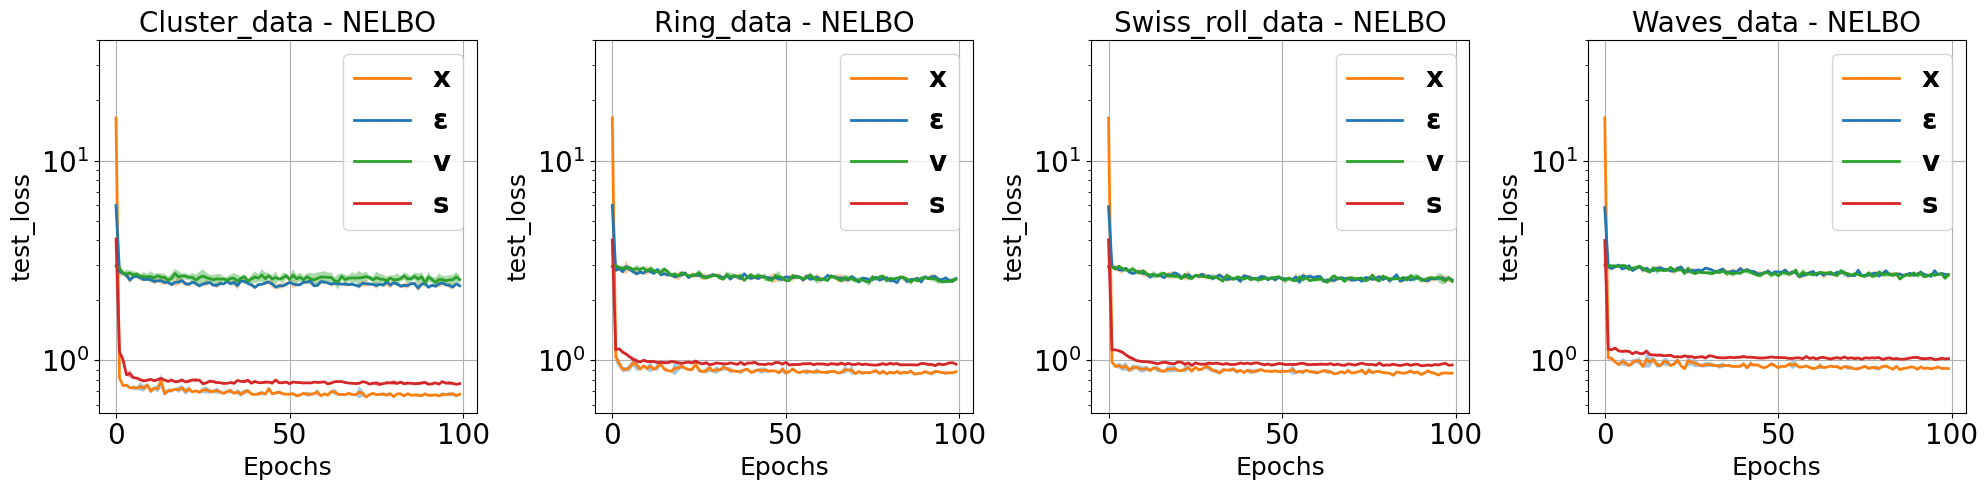

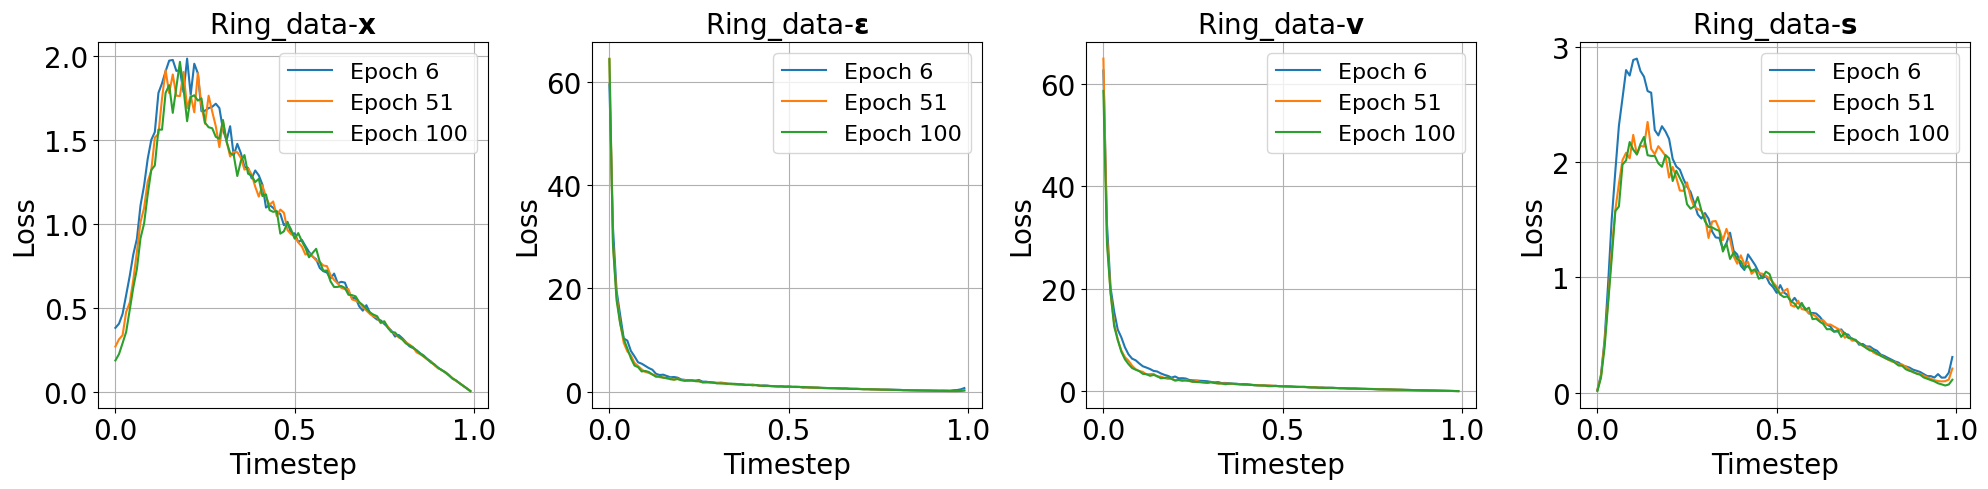

In [2]:

# Average Loss

base_path = "saved_data/2Dim/ELBO/"
loss_files = [
    "diffusion_loss_epsilon_training_results",
    "diffusion_loss_x_training_results",
    "diffusion_loss_v_training_results",
    "diffusion_loss_score_training_results"
]

executions = 3  

avg_losses = utils.calculate_average_final_test_loss(base_path, loss_files, executions)
# Print out the average test losses
for data_type, losses in avg_losses.items():
    print(f"{data_type}:")
    for loss_type, avg_loss in losses.items():
        if loss_type != "count":
            print(f"  {loss_type}: {avg_loss:.4f}")


# Plot for test or train
loss_type = 'test_loss'
scale_type = 'NELBO'
utils.plot_loss_across_epochs(base_path, loss_files, executions, loss_type, scale_type)

# Plot loss vs time for all datasets
data_type = 'Ring_data'
utils.plot_loss_by_t_per_epoch(base_path, data_type)


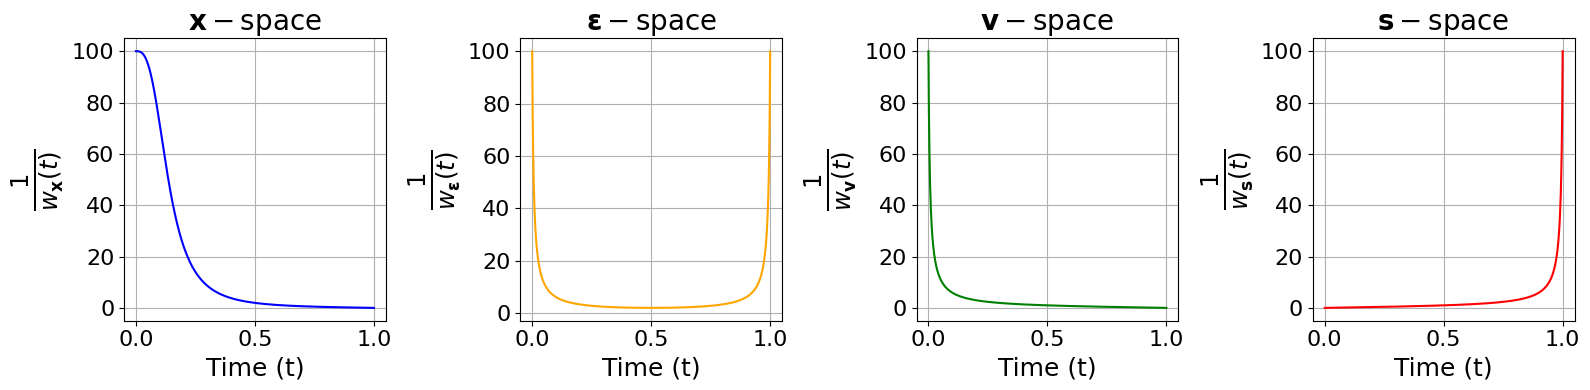

In [2]:
# plot_elbo_coefficients
utils.plot_elbo_coefficients()

## Weighted

Cluster_data:
  epsilon: 0.3522
  x: 0.4754
  v: 0.8264
  score: 2.6934
Ring_data:
  epsilon: 0.4266
  x: 0.4932
  v: 0.9227
  score: 3.0981
Swiss_roll_data:
  epsilon: 0.4261
  x: 0.4934
  v: 0.9171
  score: 3.0274
Waves_data:
  epsilon: 0.4500
  x: 0.4939
  v: 0.9411
  score: 3.4165


/home/k64728/Thesis_Repo/utils.py:685: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 40)


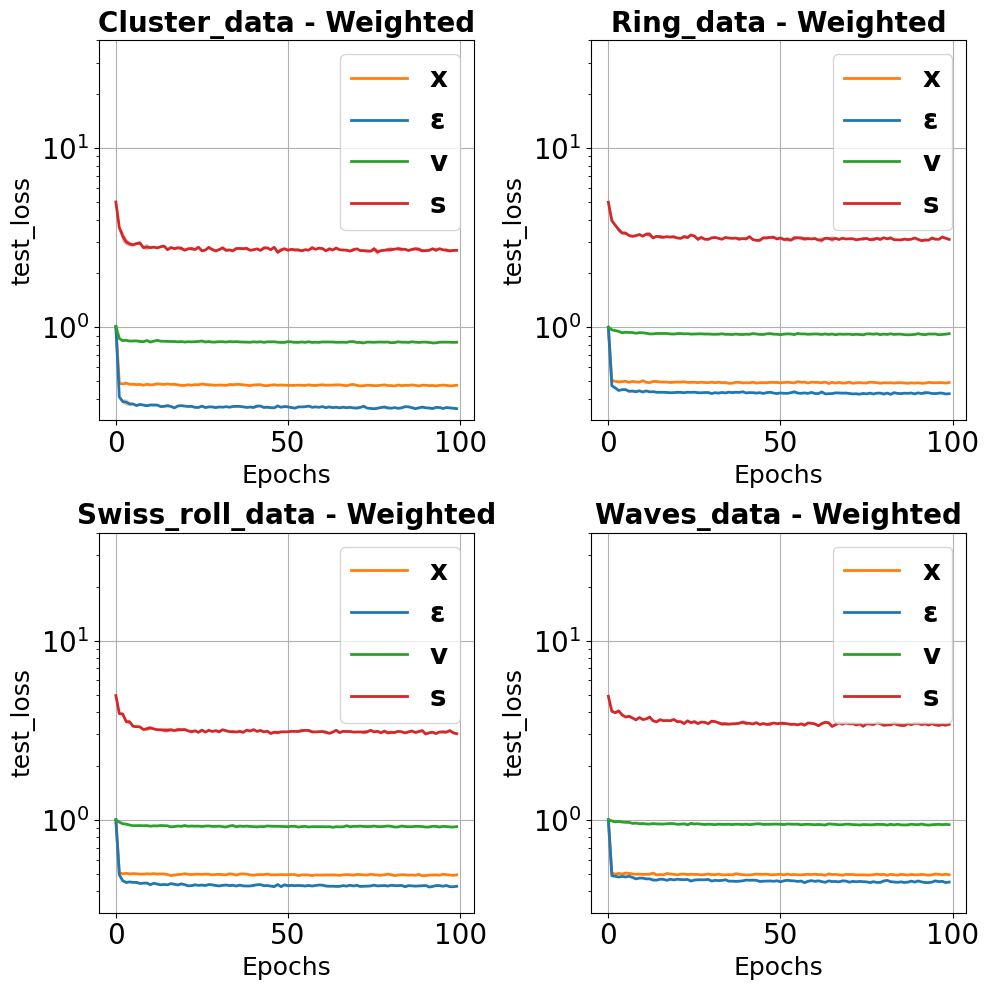

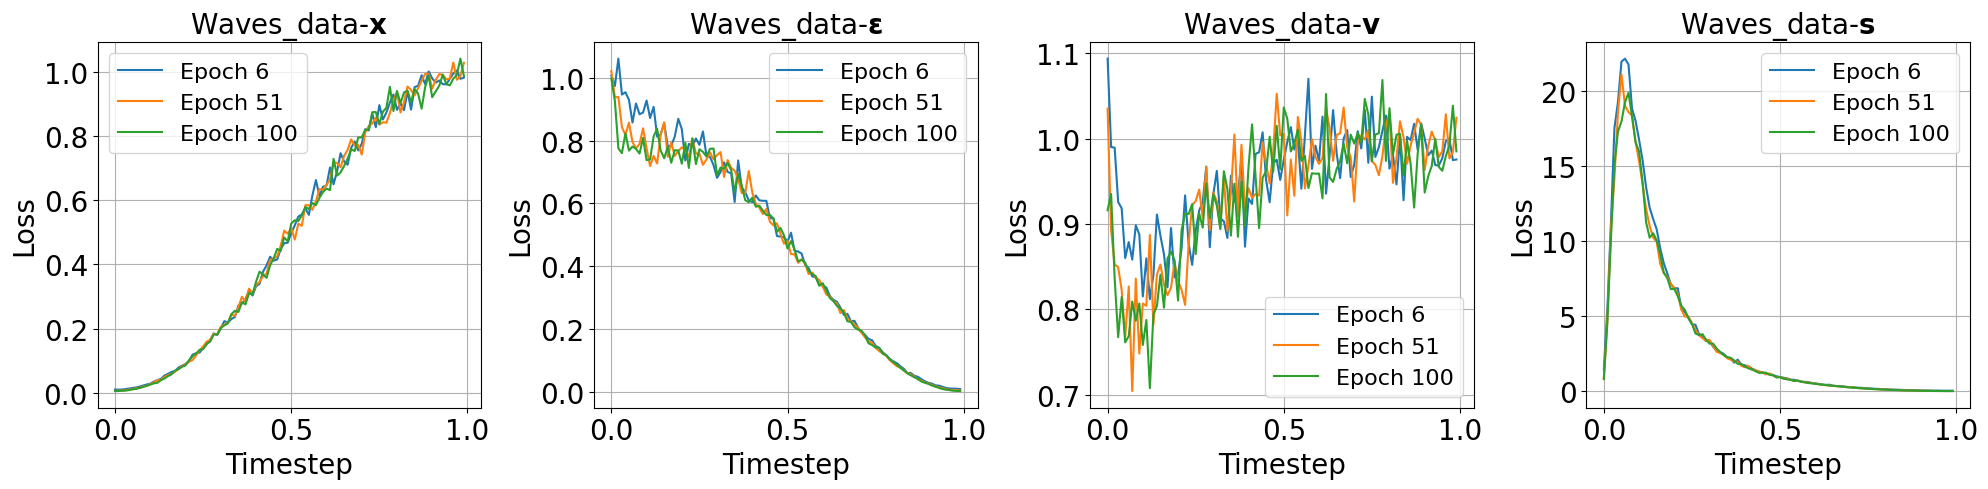

In [2]:
# Average Loss

base_path = "saved_data/2Dim/Weighted/"
loss_files = [
    "diffusion_loss_epsilon_training_results",
    "diffusion_loss_x_training_results",
    "diffusion_loss_v_training_results",
    "diffusion_loss_score_training_results"
]

executions = 3  

avg_losses = utils.calculate_average_final_test_loss(base_path, loss_files, executions)
# Print out the average test losses
for data_type, losses in avg_losses.items():
    print(f"{data_type}:")
    for loss_type, avg_loss in losses.items():
        if loss_type != "count":
            print(f"  {loss_type}: {avg_loss:.4f}")


# Plot for test or train
loss_type = 'test_loss'
scale_type = 'Weighted'
utils.plot_loss_across_epochs(base_path, loss_files, executions, loss_type, scale_type)

# Plot loss vs time for all datasets
data_type = 'Waves_data'
utils.plot_loss_by_t_per_epoch(base_path, data_type)


## Weighted Equivalent

saved_models/2Dim/Weighted/Cluster_data/diffusion_loss_x_model


100%|██████████| 100/100 [00:20<00:00,  4.79it/s]


saved_models/2Dim/Weighted/Ring_data/diffusion_loss_x_model


100%|██████████| 100/100 [00:20<00:00,  4.83it/s]


saved_models/2Dim/Weighted/Swiss_roll_data/diffusion_loss_x_model


100%|██████████| 100/100 [00:20<00:00,  4.89it/s]


saved_models/2Dim/Weighted/Waves_data/diffusion_loss_x_model


100%|██████████| 100/100 [00:20<00:00,  4.94it/s]
/home/k64728/Thesis_Repo/utils.py:762: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 40)


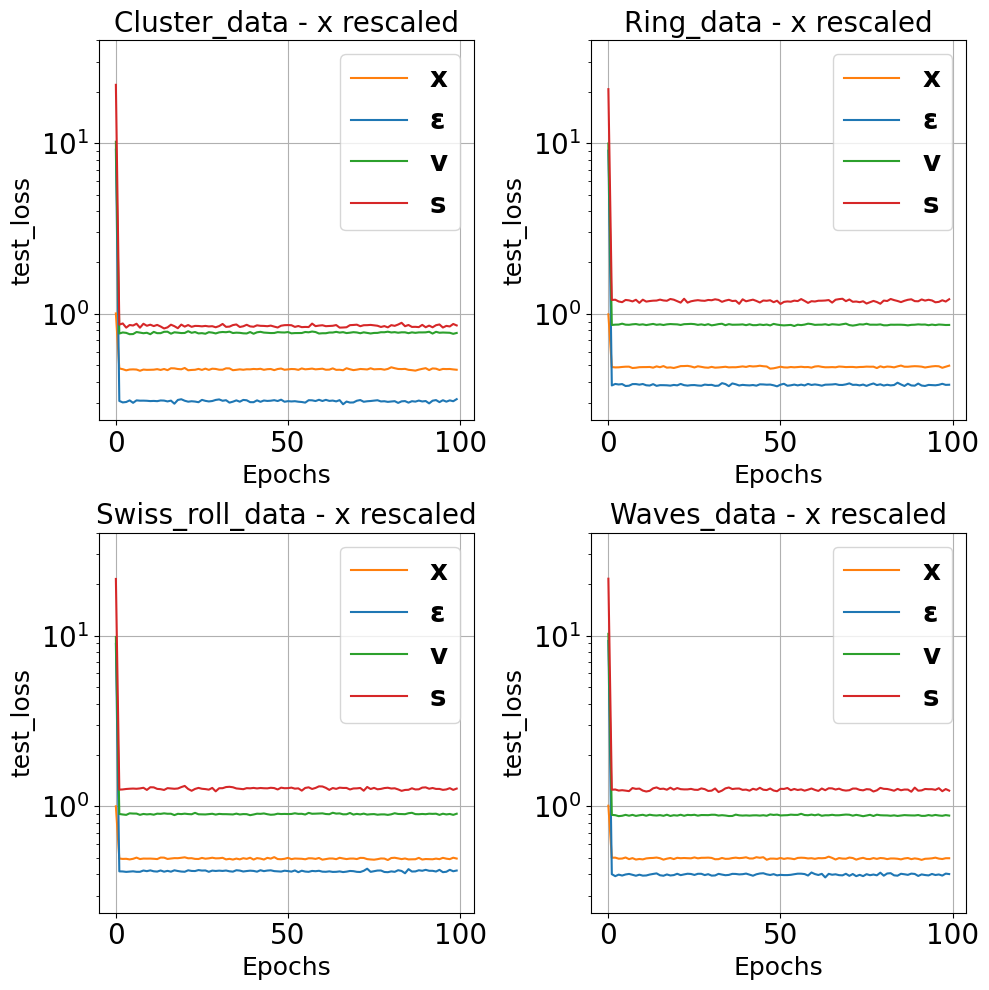

In [2]:
base_path = "saved_models/2Dim/Weighted"
Equivalent_losses = {}

for key,val in data_dict.items():
    model_path = os.path.join(base_path, key, "diffusion_loss_x_model")
    print(model_path)
    model = train2D.run_saved_model_2D(model_path)
    _, test_data = utils.split_train_test(val)
    Equivalent_loss_dict = train2D.evaluate_on_scaled_loss(test_data, model_path)
    Equivalent_losses[key] = Equivalent_loss_dict

utils.plot_equivalent_losses(Equivalent_losses)

## Rescaled

100%|██████████| 100/100 [00:13<00:00,  7.19it/s]
/home/k64728/Thesis_Repo/utils.py:775: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 40)


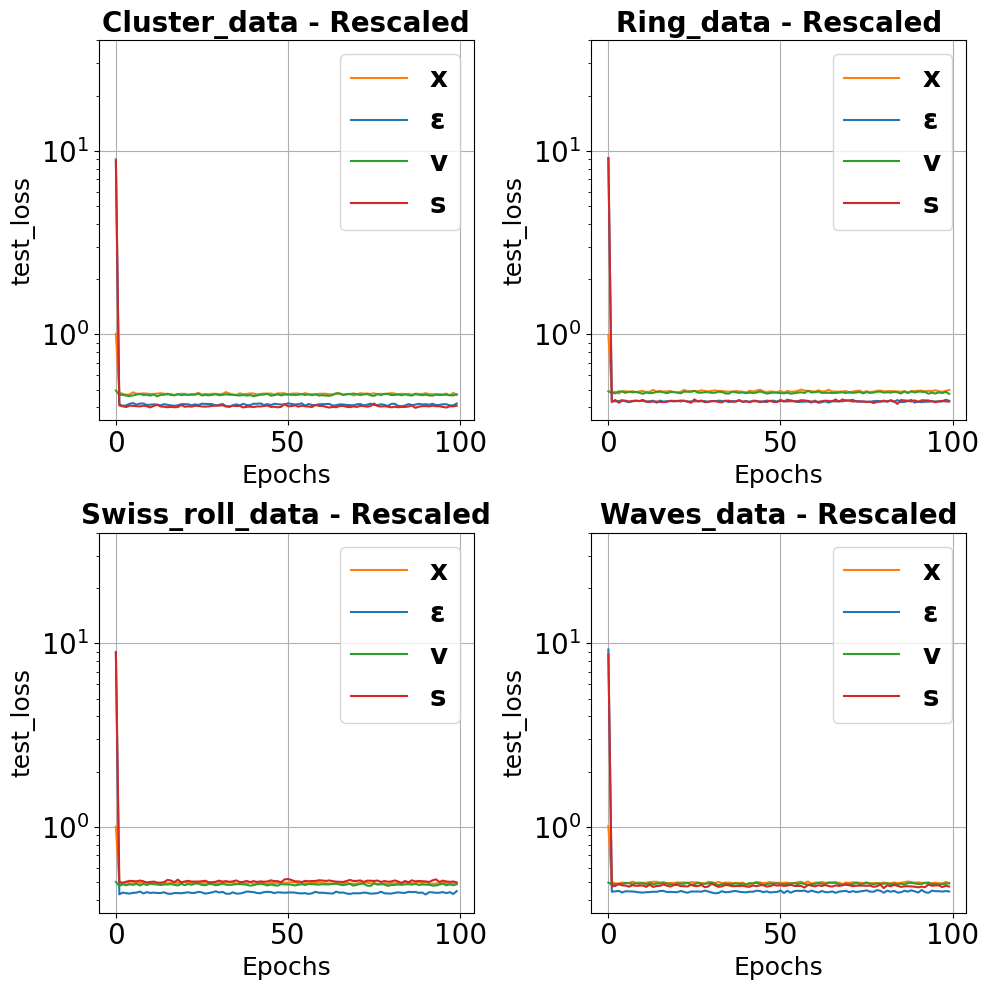

In [2]:
base_path = "saved_models/2Dim/Weighted"
Equivalent_losses = {}
# models_list = ['diffusion_loss_x_model', 'diffusion_loss_epsilon_model', 'diffusion_loss_v_model', 'diffusion_loss_score_model']
# i=0
for key,val in data_dict.items():
    # model = models_list[i]
    # model_path = os.path.join(base_path, key, f"{model}")
    # print(model_path)
    # model = train2D.run_saved_model_2D(model_path)
    _, test_data = utils.split_train_test(val)
    Equivalent_loss_dict = train2D.evaluate_on_scaled_loss(test_data, key)
    Equivalent_losses[key] = Equivalent_loss_dict
    # i+=1
utils.plot_equivalent_losses(Equivalent_losses)

saved_models/2Dim/Weighted/Cluster_data/diffusion_loss_x_model


100%|██████████| 100/100 [00:13<00:00,  7.18it/s]


saved_models/2Dim/Weighted/Ring_data/diffusion_loss_epsilon_model


100%|██████████| 100/100 [00:13<00:00,  7.18it/s]


saved_models/2Dim/Weighted/Swiss_roll_data/diffusion_loss_v_model


100%|██████████| 100/100 [00:13<00:00,  7.16it/s]


saved_models/2Dim/Weighted/Waves_data/diffusion_loss_score_model


100%|██████████| 100/100 [00:13<00:00,  7.20it/s]
/home/k64728/Thesis_Repo/utils.py:775: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 40)


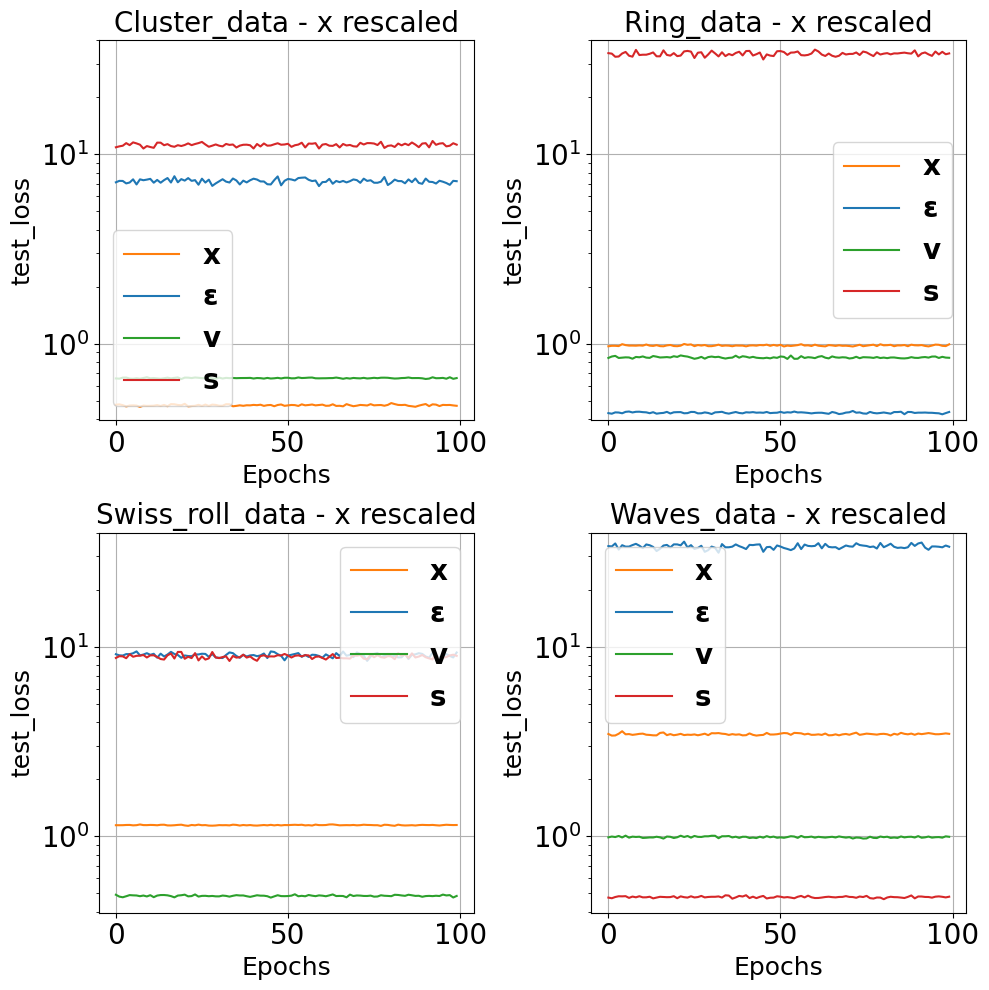

In [2]:
base_path = "saved_models/2Dim/Weighted"
Equivalent_losses = {}
models_list = ['diffusion_loss_x_model', 'diffusion_loss_epsilon_model', 'diffusion_loss_v_model', 'diffusion_loss_score_model']
i=0
for key,val in data_dict.items():
    model = models_list[i]
    model_path = os.path.join(base_path, key, f"{model}")
    print(model_path)
    model = train2D.run_saved_model_2D(model_path)
    _, test_data = utils.split_train_test(val)
    Equivalent_loss_dict = train2D.evaluate_on_scaled_loss(test_data, model_path)
    Equivalent_losses[key] = Equivalent_loss_dict
    i+=1
utils.plot_equivalent_losses(Equivalent_losses)

## Sample Generation and Quality


Metrics for data generated using diffusion_loss_x:
Mean Distance (Euclidean): 0.447497672402937
Covariance Distance (Frobenius): 0.33942130061286285

Metrics for data generated using diffusion_loss_epsilon:
Mean Distance (Euclidean): 0.037851273621371036
Covariance Distance (Frobenius): 0.1571305433401719

Metrics for data generated using diffusion_loss_v:
Mean Distance (Euclidean): 0.06096422969307628
Covariance Distance (Frobenius): 0.03738421818704091

Metrics for data generated using diffusion_loss_score:
Mean Distance (Euclidean): 0.29690365167234406
Covariance Distance (Frobenius): 0.12497806867119192


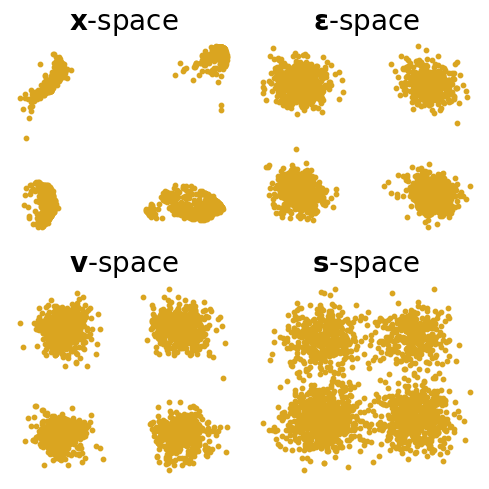

In [ ]:
# Generate samples after 512 sampling steps
base_path = "saved_models/2Dim/"
scale_type = 'Weighted'
real_data = Swiss_roll_data
data_type = 'Swiss_roll_data'
losses = [loss.diffusion_loss_x, loss.diffusion_loss_epsilon, loss.diffusion_loss_v, loss.diffusion_loss_score]
sample_type = [sample.sampling_x, sample.sampling_epsilon, sample.sampling_v, sample.sampling_score]
all_samples = np.zeros((4, 2000, 2))
for i,loss_type in enumerate(losses):
    file_name = f"{loss_type.__name__}_model"
    model_path = os.path.join(base_path,scale_type,data_type,file_name)
    _, model = train2D.run_saved_model_2D(model_path)
    device = next(model.parameters()).device
    rand_data = torch.randn((2000,2))
    num_steps = 512
    sample_func = sample_type[i]
    gen_sample = sample_func(model, rand_data, device, num_steps).detach().cpu().numpy()
    gen_sample_quality = evaluate.compute_moment_metrics(real_data, gen_sample)
    print(f"\nMetrics for data generated using {loss_type.__name__}:")
    print("Mean Distance (Euclidean):", gen_sample_quality['mean_distance'])
    print("Covariance Distance (Frobenius):", gen_sample_quality['covariance_distance'])
    all_samples[i] = gen_sample

utils.plot_samples(all_samples, data_type)



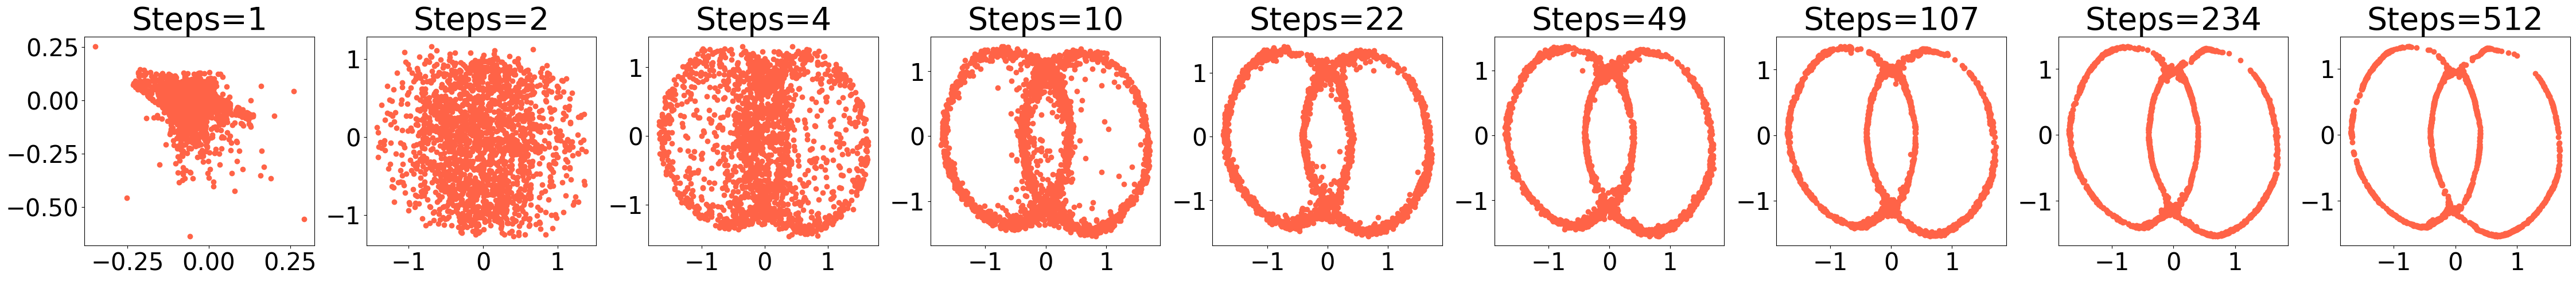

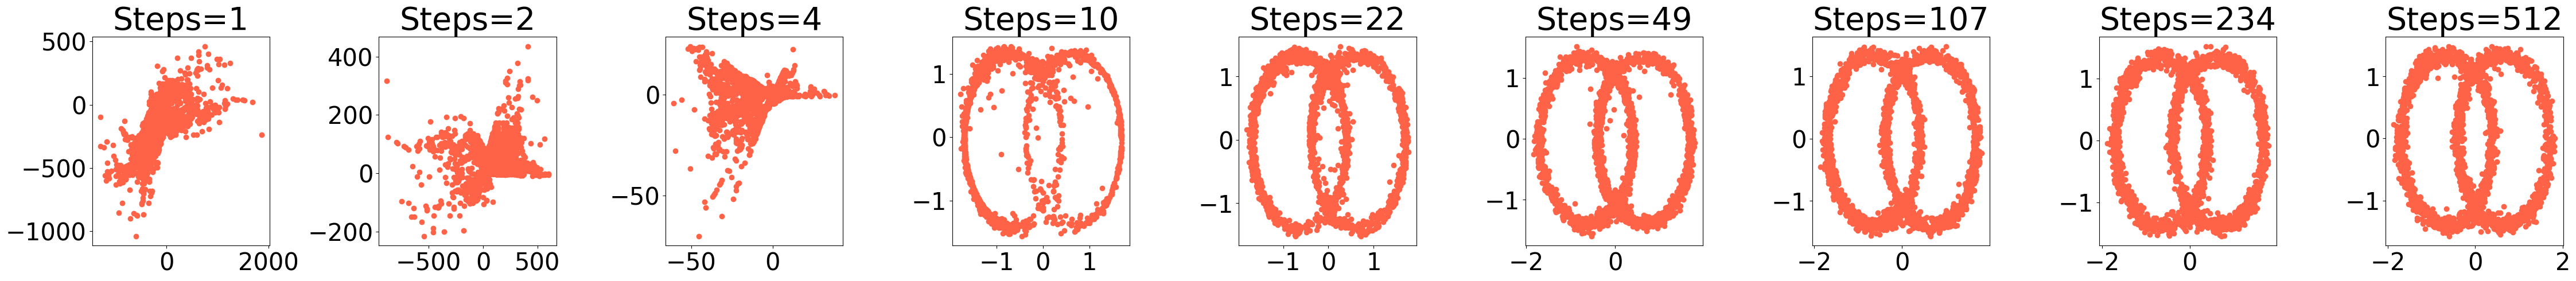

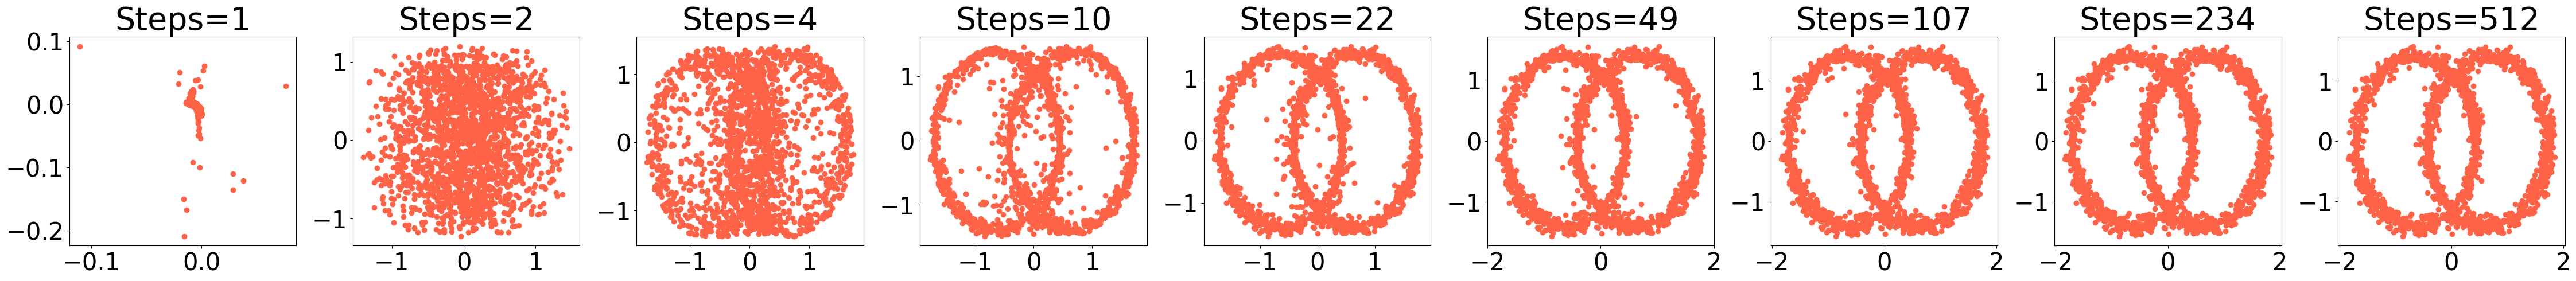

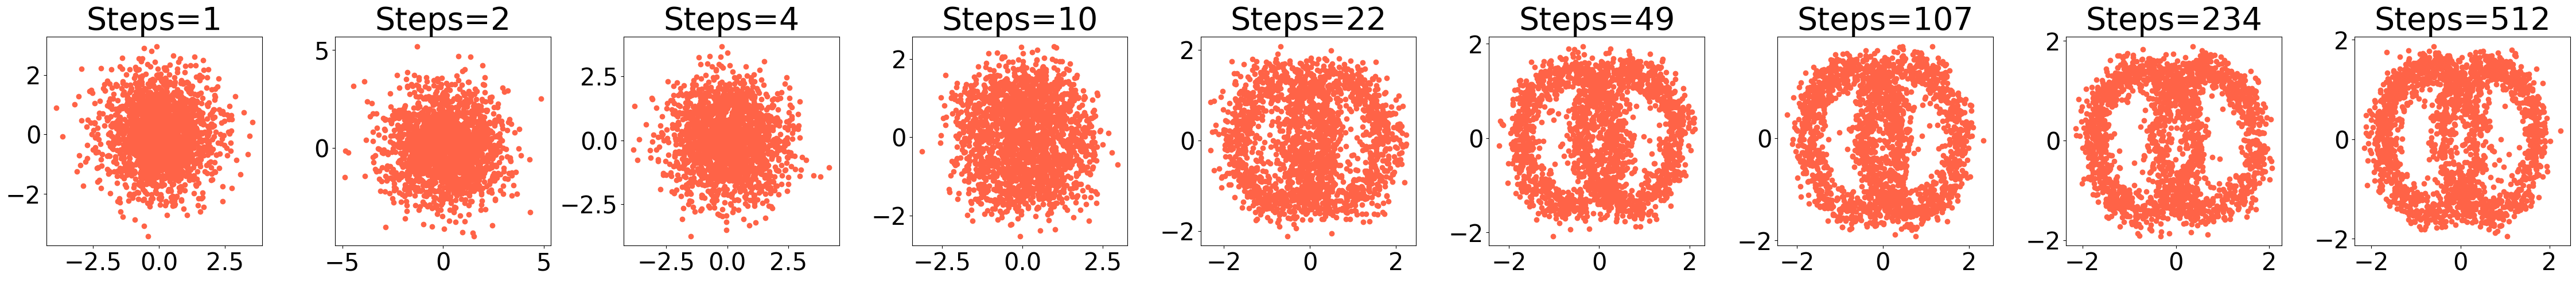

In [9]:
# Generate samples from different time steps
base_path = "saved_models/2Dim/"
scale_type = 'ELBO'
real_data = Ring_data
data_type = 'Ring_data'
losses = [loss.diffusion_loss_x, loss.diffusion_loss_epsilon, loss.diffusion_loss_v, loss.diffusion_loss_score]
sample_type = [sample.sampling_x, sample.sampling_epsilon, sample.sampling_v, sample.sampling_score]
all_samples = np.zeros((4, 2000, 2))
for i,loss_type in enumerate(losses):
    file_name = f"{loss_type.__name__}_model"
    model_path = os.path.join(base_path,scale_type,data_type,file_name)
    _, model = train2D.run_saved_model_2D(model_path, data_type, sampling = sample_type[i], plot_samples = True)

